<a href="https://colab.research.google.com/github/HansIgnaci0/EDA_FundamentosML_HansMancilla/blob/main/NotebookPruebaHansMancilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion
**Analisis de datos**

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) es el proceso de analizar conjuntos de datos para resumir sus características clave, generalmente mediante métodos visuales. Este paso es esencial en el proceso de aprendizaje automático, ya que nos ayuda a entender la estructura, los patrones y los posibles problemas dentro de los datos antes de pasar al modelado

**¿Qué datos trabajaremos hoy??**

Para ejemplos de la prueba usaremos un conjunto de datos de E-Commerce publicos. Dichos datos con los cuales trabajaremos son todas las transacciones realizadas entre el 01/12/2010 y el 09/12/2011 para una tienda online sin establecimientos físicos con sede en el Reino Unido.

A continuacion daremos paso al analisis de dichos datos paso por paso con su respectiva descripcion.

# 1.- Importacion de las bibliotecas necesarias

Para comenzar a trabajar con el dataset necesitamos una serie de herramientas previamente convocadas, dichas herramientas las obtenemos gracias a las librerias, las cuales debemos importar desde el codigo.

In [1]:
import pandas as pd  # Biblioteca principal para el manejo de datos en DataFrames
import numpy as np  # Biblioteca para trabajar con arrays y operaciones matemáticas

import matplotlib.pyplot as plt  # Biblioteca para crear gráficos y visualizaciones
from matplotlib import style  # Estilo de gráficos de matplotlib
import seaborn as sns  # Biblioteca para mejorar la visualización con gráficos estadísticos

from scipy.stats import pearsonr  # Función para calcular la correlación de Pearson
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal de scikit-learn
from sklearn.model_selection import train_test_split  # Función para dividir los datos en conjunto de entrenamiento y prueba
from sklearn.metrics import r2_score  # Métrica para calcular el R^2 (coeficiente de determinación)
from sklearn.metrics import mean_squared_error  # Métrica para calcular el error cuadrático medio (MSE)

# Configuración de parámetros globales de visualización

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"


style.use('ggplot')

# Biblioteca para manejar advertencias
import warnings
warnings.filterwarnings('ignore')

# 2.-Importacion del dataframe
Una vez obtenidas las herramientas o bibliotecas ya podemos comenzar a trabajar con los datos que queremos analizar, para esto debemos traer el dataset sobre el cual queremos trabajar y hacer el analisis. Dicho dataset debe estar previamente descargado para poder subirlo con el siguiente codigo.

In [5]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",",encoding="ISO-8859-1")

#Mostraremos los primeros 5 datos.
df.head()

Saving data.csv to data (1).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
#Ultimas 5 filas
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# 3.- Revision del tipo de valor por columna.

Una vez importadas las biblioteca y el dataset con el que trabajaremos podemos dar pie al analisis, uno de los primeros pasos y fundamental es definir que tipo de dato es cada columna del dataset, y esto se logra gracias al siguiente codigo.

In [7]:
#Codigo para revisar el tipo de cada columna del dataframe.
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


# 4.-Eliminar valores null

In [42]:
#En este caso usaremos la columna StockCode como ejemplo.
df['StockCode'].describe()

,StockCode
count,406829
unique,3684
top,85123A
freq,2077


# 5.- Estadistica descriptiva de las columnas.

Con una simple linea de codigo podemos generar sus medidas de tendencia central y dispercion.

In [12]:
#Codigo para imprimir la estadistica descriptiva de todas la columnas NUMERICAS
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Y si bien necesitamos analizar solo una columan en especificio, debemos indicarla como parametro con el codigo que se muestra a continuacion

In [18]:


#Eliminacion de los datos "null"
df = df.dropna()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 6.- Generacion de histograma.
Los graficos son fundamentales para el analisis, ya que nos permiten evidenciar de una forma clara los patrones y tendencias de los datos. Uno de los graficos mas usados e utiles es el que generaremos a continuacion, el histograma. Es importante tener en coinsideracion para entender este histograma que en el eje X se encuentran los valores variables y en el eje Y las veces que estos se repiten.

Como en esta ocasion el dataframe con el que estamos trabajando cuentas con gran cantidad de datos, para esta instancia de prueba usaremos los valores mas frecuentes que se repiten mas para una mejor legibilidad del grafico, a continuacion se presenta como:

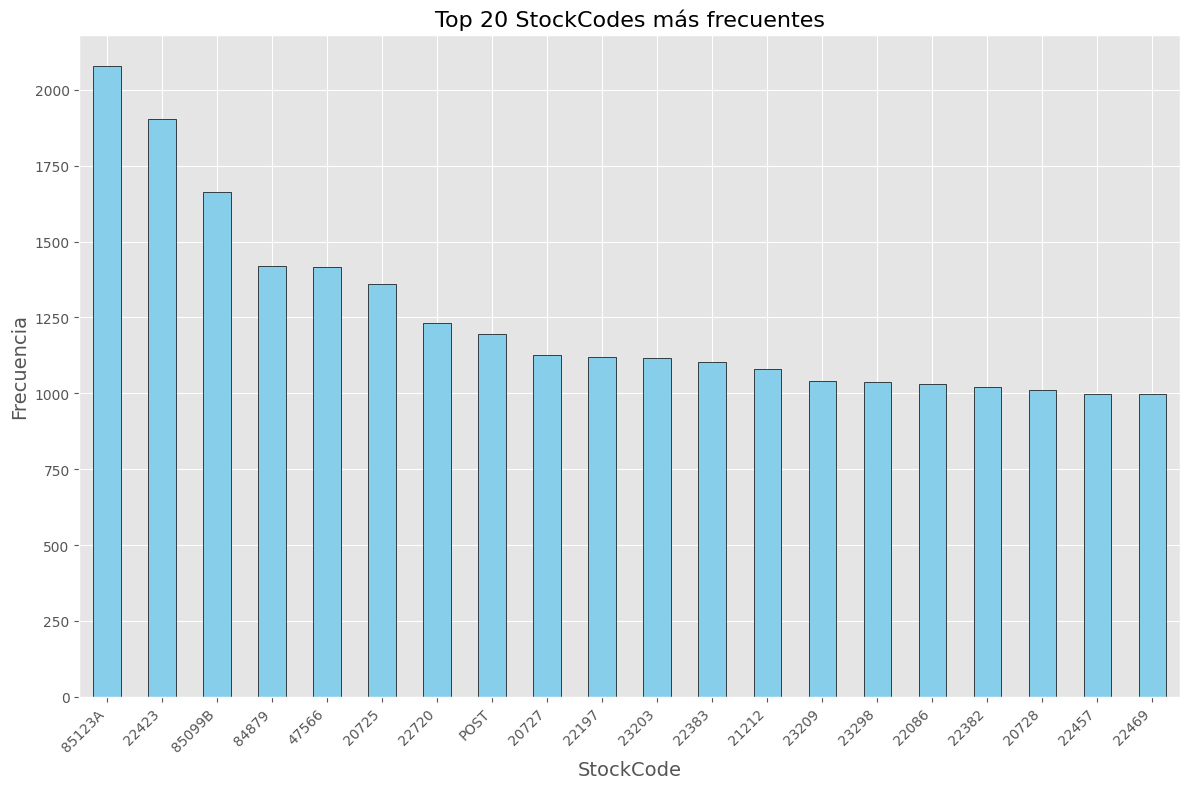

In [34]:

# Primero, calculamos las frecuencias de los códigos de stock
stock_counts = df['StockCode'].value_counts()

# Seleccionar solo las 20 categorías más frecuentes (se puede ajustar este número)
top_stock_codes = stock_counts.head(20)

# Crear un gráfico
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño de la figura para que se vea bien

top_stock_codes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 20 StockCodes más frecuentes', fontsize=16)
plt.xlabel('StockCode', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para evitar que se solapen los textos
plt.show()


# 7.-Mas graficos utiles

El histograma no es el unico grafico posible, ya que podemos generar varios otros tipos de graficos que nos pueden presentar de otra forma los datos para mejorar la visualizacion de los datos.

# **7.1.- Gráfico de Dispersión (Scatter Plot):**

**Cuándo usarlo:**

  Cuando desees explorar la relación entre dos variables numéricas.

  Es útil para ver si hay alguna correlación o tendencia lineal entre las dos variables.

**Ejemplo de uso:** Si tienes datos de ataque y defensa de Pokémon, un gráfico de dispersión te permitirá ver si existe alguna relación entre estas dos características.

<Axes: xlabel='Country', ylabel='StockCode'>

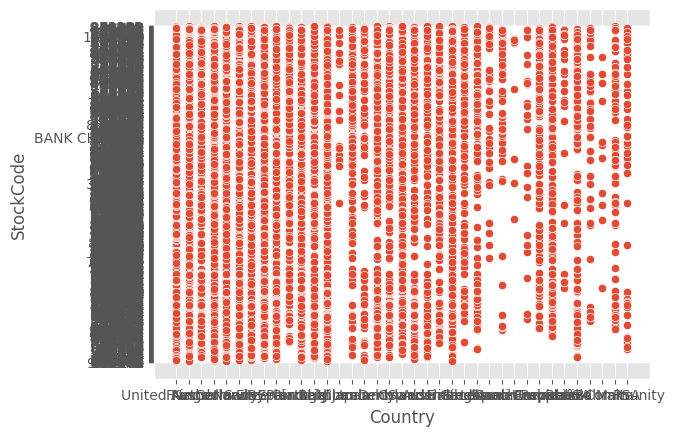

In [41]:
sns.scatterplot(x='Country', y='StockCode', data=df)

# 7.2.-Boxplot (Diagrama de Caja):
 **Cuándo usarlo:**

Cuando quieras visualizar la distribución estadística de una variable, destacando la mediana, los cuartiles y los valores atípicos.

Es útil para comparar la distribución de una variable en diferentes grupos o categorías.

Ejemplo de uso: Si deseas comparar la distribución del ataque entre diferentes tipos de Pokémon (agua, fuego, eléctrico, etc.), un boxplot es ideal.

**Aqui una grafica de como leer un diagrama de caja:**

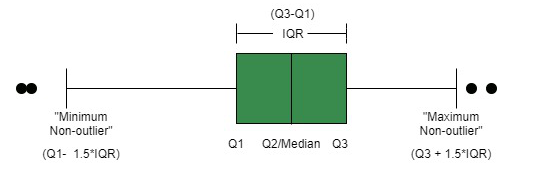

<Axes: xlabel='Country', ylabel='StockCode'>

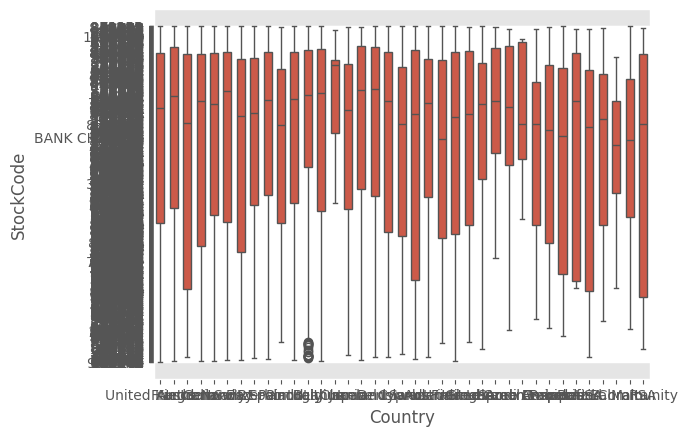

In [40]:
sns.boxplot(x='Country', y='StockCode', data=df, width=0.6)

7.3.- Catplot:
Cuándo usarlo:

Cuando deseas realizar un gráfico categórico que combine varios gráficos, como boxplot, scatterplot o barplot, dependiendo del tipo de datos que tienes.

Es útil para comparar distribuciones o relaciones en grupos o categorías.

Ejemplo de uso: Si deseas comparar cómo se distribuyen diferentes atributos numéricos de Pokémon (como ataque, defensa, etc.) según su tipo, puedes usar un catplot.

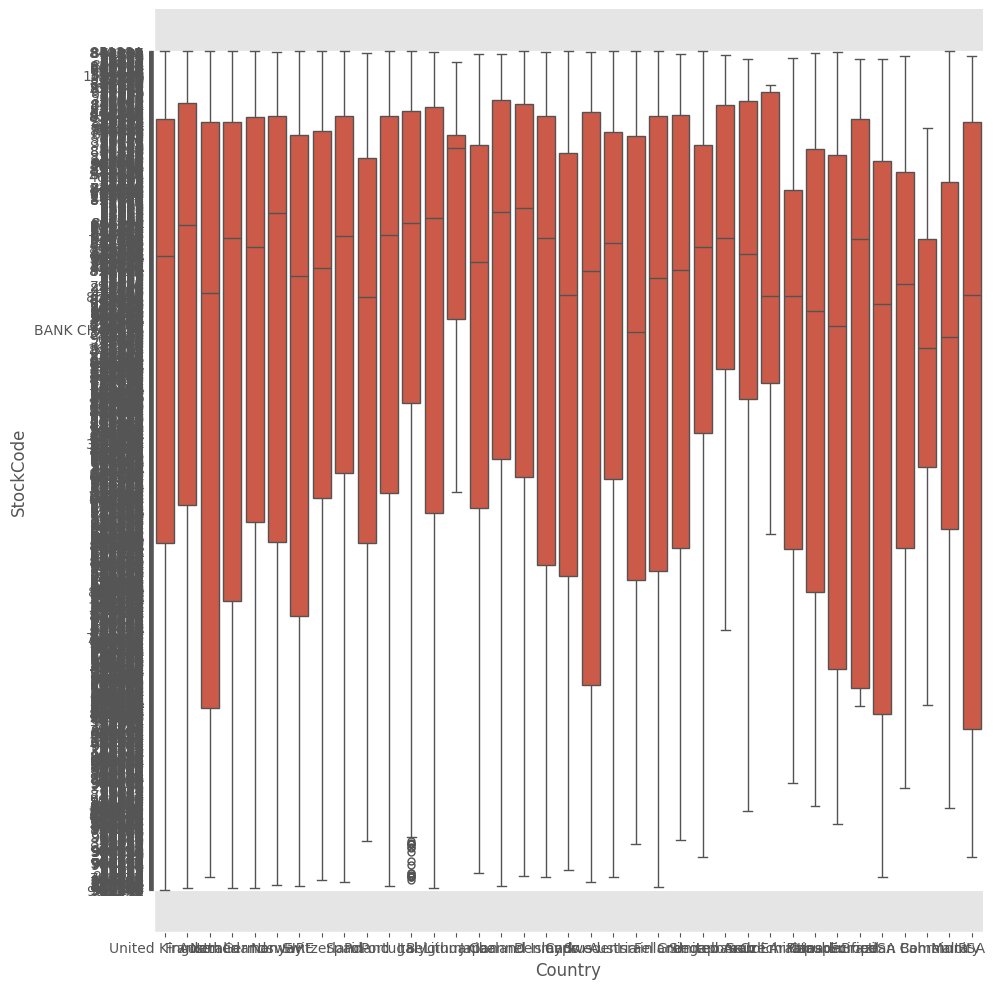

In [43]:
sns.catplot(x='Country', y='StockCode', kind='box', data=df, height=10)